# Name: Kunal Ghosh

# Course: M.Tech (Aerospace Engineering)

# Subject: AE 291 (Matrix Computations)

# SAP No.: 6000007645

# S.R. No.: 05-01-00-10-42-22-1-21061

********************************************************************************************************************

# Importing the necessary libraries

In [1]:
import numpy as np

In [2]:
from matplotlib import cm

In [3]:
import matplotlib.pyplot as plt

# Problem: 
## Solving 2D Poisson’s problem using Jacobi iterative method
## Consider the 2D Poisson’s equation in the domain $\Omega$ = [0,1] $\times$ [0, 1], the unit square:


$$-\frac{\partial^2 u}{\partial x^2 } -\frac{\partial^2 u}{\partial y^2 } = f\qquad in \qquad \Omega, \tag{1}$$

## with the boundary condition
$$u = g \qquad on \qquad \partial \Omega \tag{2}$$ 

## where f and g are given functions, and ∂Ω represents the boundary of Ω. Eq. 1 can be discretized using the centered Finite difference method (as explained in the class).

## Write a function that implements Jacobi iteration method for the discretized Poisson’s problem, where f = 0, and g is given as,

$$g(x,y) = \begin{cases}
0 \qquad\qquad\qquad if\:x = 0
\\
y \qquad\qquad\qquad if\:x = 1
\\
(x-1)sin(x) \:\:\:\:\:\:\: if\:y = 0
\\
x(2-x) \qquad\:\:\:\:\:\: if\:y = 1
\end{cases}$$

## Take the initial guess as $u^{(0)} = 0$. Consider three mesh intervals: h = 1/10, h = 1/20 and h = 1/40. The iterations should be continued until the relative change in the solution u from one iteration to another is less than $10^{-8}$ . More precisely, stop the iterations when

$$\frac{||u^{(k+1)}-u^{(k)}||_2}{||u^{(k+1)}||_2} < 10^{-8} \tag{3}$$

## Submit a short report, where, for each h,

## 1. Plot the relative error (LHS of Eq. 3) versus the iteration index (k). In the plot, the relative error should be in base-10 logarithmic scale (For example, see the command ”semilogy” in matlab). Report the number of iterations required to arrive at the convergence criteria given in Eq. 3

********************************************************************************************************************

## Answer (1):

## Set of values of the h

In [4]:
H = [1/10,1/20,1/40]

## Defining the domain: $\Omega$ = [0,1] $\times$ [0, 1]

In [5]:
x_0 = 0

In [6]:
x_l = 1

In [7]:
y_0 = 0

In [8]:
y_l = 1

## Function to implement the boundary conditions

$$g(x,y) = \begin{cases}
0 \qquad\qquad\qquad if\:x = 0
\\
y \qquad\qquad\qquad if\:x = 1
\\
(x-1)sin(x) \:\:\:\:\:\:\: if\:y = 0
\\
x(2-x) \qquad\:\:\:\:\:\: if\:y = 1
\end{cases}$$

In [9]:
def g(x,y):
    """
    g(x,y) sets the boundary conditions at based on the coordinates of the node, x and y.
    If the given node does not lie on the boundary then 0 will be returned.
    x: x coordinate
    y: y coordinate
    """
    if x == 0:
        return 0
    if x == 1:
        return y
    if y == 0:
        return (x-1)*np.sin(x)
    if y == 1:
        return x*(2-x)
    else: 
        return 0

In [10]:
def f(x,y):
    """
    f(x,y) evaluated the function f of the question based on the coordinates of the node, x and y.
    x: x coordinate
    y: y coordinate
    """
    return 0

## Stopping criteria:

$$\frac{||u^{(k+1)}-u^{(k)}||_2}{||u^{(k+1)}||_2} < 10^{-8} \tag{3}$$

In [11]:
def Error_Function(u_new,u):
    """
    Error_Function(u_new,u) evaluates the error.
    u_new: u(k+1)
    u: u(k)
    """
    
    # Calculating the numerator
    temp = (((u_new.flatten()-u.flatten())**2).sum())**0.5
    
    # Calculating the denominator
    temp_1 = (((u_new.flatten())**2).sum())**0.5
    
    # Calculating the error
    temp = temp/temp_1
    
    return temp

In [12]:
Tolerance = 1e-8

## A dictionary to store errors

In [13]:
Error = {}

## A dictionary to store u

In [14]:
U = {}

## A dictionary to store meshgrids

In [15]:
X_Y_dict = {}

$$-\frac{\partial^2 u}{\partial x^2 } -\frac{\partial^2 u}{\partial y^2 } = f\qquad in \qquad \Omega$$

$$\frac{\partial^2 u}{\partial x^2 } + \frac{\partial^2 u}{\partial y^2 } = -f\qquad in \qquad \Omega$$

$$\Delta x = \Delta y = h$$

$$\frac{u_{(i+1,j)} - 2u_{(i,j)} + u_{(i-1,j)}}{h^2 } + \frac{u_{(i,j+1)} - 2u_{(i,j)} + u_{(i,j-1)}}{h^2 } = f_{(i,j)}$$

$$\frac{u_{(i+1,j)} - 2u_{(i,j)} + u_{(i-1,j)} + u_{(i,j+1)} - 2u_{(i,j)} + u_{(i,j-1)}}{h^2 } = f_{(i,j)}$$

$$\frac{u_{(i+1,j)} + u_{(i,j+1)} - 4u_{(i,j)} + u_{(i-1,j)} + u_{(i,j-1)}}{h^2 } = f_{(i,j)}$$

$$u_{(i+1,j)} + u_{(i,j+1)} - 4u_{(i,j)} + u_{(i-1,j)} + u_{(i,j-1)} = h^2f_{(i,j)}$$

$$u_{(i+1,j)} + u_{(i,j+1)} + u_{(i-1,j)} + u_{(i,j-1)} - h^2f_{(i,j)}= 4u_{(i,j)}$$

$$\frac{u_{(i+1,j)} + u_{(i,j+1)} + u_{(i-1,j)} + u_{(i,j-1)} - h^2f_{(i,j)}}{4}= u_{(i,j)}$$

$$u_{(i,j)} = \frac{u_{(i+1,j)} + u_{(i,j+1)} + u_{(i-1,j)} + u_{(i,j-1)} - h^2f_{(i,j)}}{4}$$

## Jacobi Iteration:

$$u^{k+1}_{(i,j)} = \frac{u^{k}_{(i+1,j)} + u^{k}_{(i,j+1)} + u^{k}_{(i-1,j)} + u^{k}_{(i,j-1)} - h^2f_{(i,j)}}{4}$$

In [16]:
def Jacobi_Solver(u,U,Error,Tolerance,f,x,y):
    """
    Jacobi_Solver(u,U,Error,Tolerance,f,x,y): Solves the given poisson equation using the Jacobi method
    u: Initial value of u in the computational domain
    U: Dictionary to store u for different values of h
    Error: Dictionary to store error at each iterations for different values of h
    Tolerance: Stopping Criteria
    f: Function evaluating the RHS of the equation
    x: X Meshgrid
    y: Y Meshgrid
    """
    # u at the next iteration
    u_new = u.copy()

    # Intializing the tolerance achieved
    temp = Tolerance+1

    # Error over iterations for a particular h
    error = []

    # While loop until the stopping criteria is met
    while temp >= Tolerance:
        
        # Updating u
        u = u_new.copy()
        
        # NOTE: We are not calculating the values of u at the boundary nodes
        for i in range(1,u.shape[0]-1):
            
            # NOTE: We are not calculating the values of u at the boundary nodes
            for j in range(1,u.shape[1]-1):
                
                # Jacobi Iteration step
                u_new[i][j] = 0.25*(u[i+1][j] + u[i][j+1] + u[i-1][j] + u[i][j-1] - ((h**2)*f(x[i,j],y[i,j])))
        
        # Calculating the relative error
        temp = Error_Function(u_new,u)
        
        # Storing the errors corresponding to each iteration
        error.append(temp)
        
    # Storing u in the dictionary
    U[h] = u_new
    
    # Storing error in the dictionary
    Error[h] = error

In [17]:
for h in H:
    
    # Mesh intervals
    dx = h
    dy = h

    # Number of the grid points
    n = (int((x_l-x_0)/dx)-1)*(int((y_l-y_0)/dy)-1)

    # Creating a meshgrid
    x = np.arange(x_0,x_l+dx,dx)
    y = np.arange(y_0,y_l+dy,dy)
    X,Y = np.meshgrid(x,y,indexing = "ij")
    
    # Storing meshgrids
    X_Y_dict[h] = (X,Y)

    # Intializing the u at the current iteraion with zeros
    u = np.zeros(((int((x_l-x_0)/dx))+1,(int((y_l-y_0)/dy))+1))

    # Applying the boundary conditions
    for i in range(u.shape[0]):
        for j in range(u.shape[1]):
            u[i,j] = g(x[i],y[j])

    # Solving the system of equation using Jacobi's Method
    Jacobi_Solver(u,U,Error,Tolerance,f,X,Y)
    
    iteraions = len(Error[h])
    
    print(f"h: {h}")
    print(f"Number of iterations required: {iteraions}\n\n")

h: 0.1
Number of iterations required: 293


h: 0.05
Number of iterations required: 1077


h: 0.025
Number of iterations required: 3882




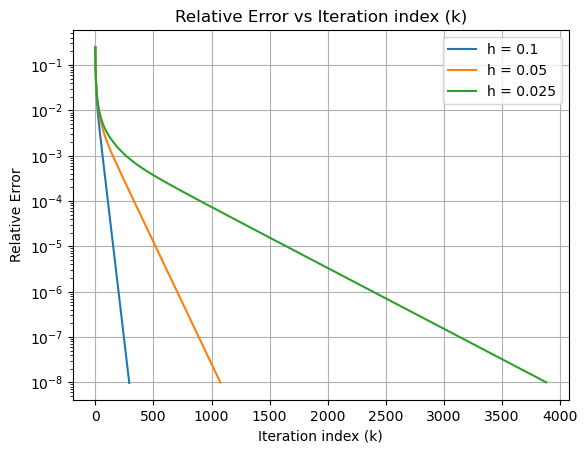

In [18]:
for h,error in Error.items():
    plt.semilogy(error,label = "h = "+str(h))
plt.legend()
# NOTE: Here, the iteration index k starts from 0
plt.xlabel("Iteration index (k)")
plt.ylabel("Relative Error")
plt.title("Relative Error vs Iteration index (k)")
plt.grid()
plt.show()

# If h = 0.1
# Then the number of iterations required is 293

# If h = 0.05
# Then the number of iterations required is 1077

# If h: 0.025
# Then the number of iterations required is 3882

# So, as the magnitude of h is decreased, the number of interations increased.

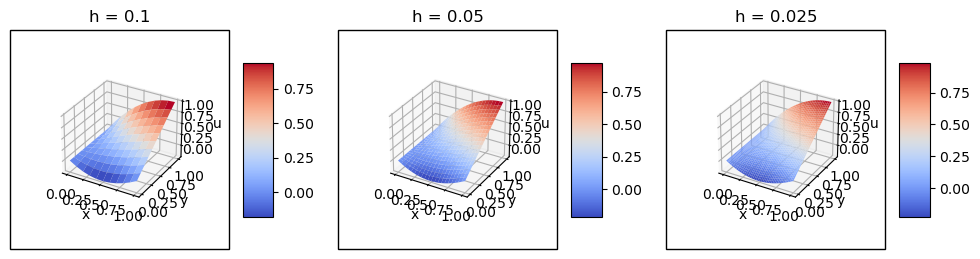

In [19]:
fig = plt.figure()
fig.set_size_inches(12,4)
ctr = 1
for h,u in U.items():
    ax = fig.add_subplot(1,3,ctr,projection = "3d")
    ctr = ctr+1
    surf = ax.plot_surface(X_Y_dict[h][0], X_Y_dict[h][1], u, cmap=cm.coolwarm,linewidth=0)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("u")
    ax.set_title(f"h = {h}")
    ax.set_box_aspect(aspect=None, zoom=0.625)
    ax.patch.set_edgecolor('black')  
    ax.patch.set_linewidth(1)  
plt.show()

# Contour Plots of the solution for different h:

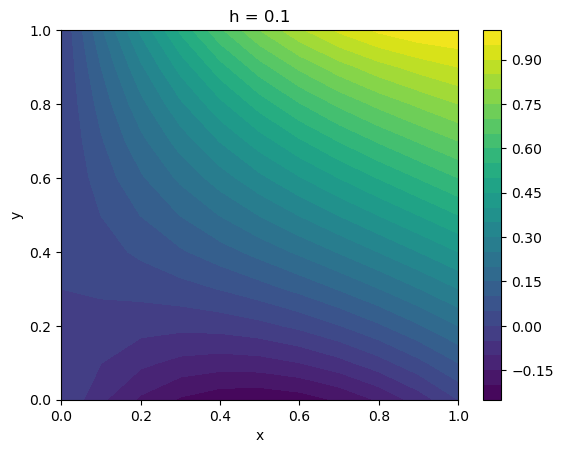

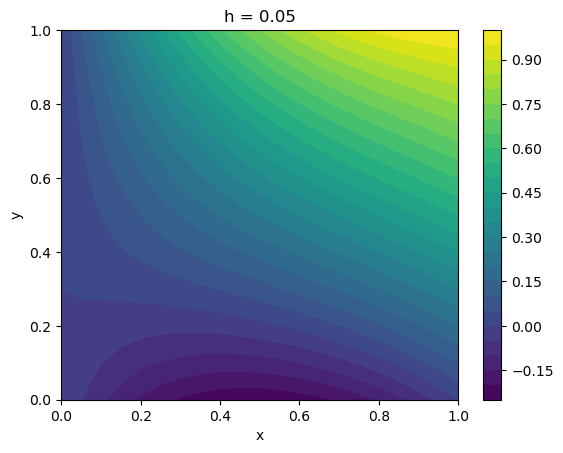

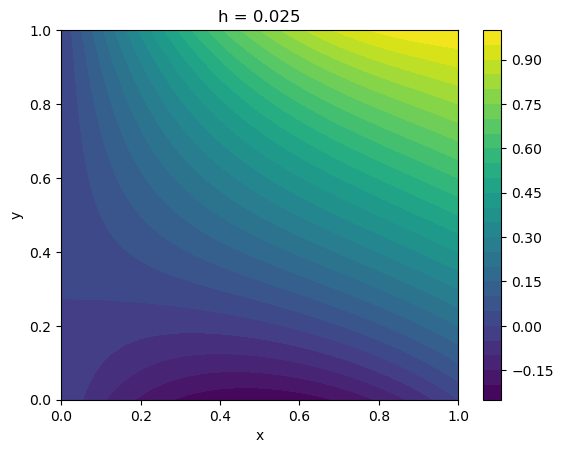

In [20]:
levels = 25
for h,u in U.items():
    plt.contourf(X_Y_dict[h][0], X_Y_dict[h][1],u,levels)
    plt.colorbar()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"h = {h}")  
    plt.show()

********************************************************************************************************************

## 2. Show a 3D surface plot of the final solution u (as a function of x and y).

********************************************************************************************************************

## Answer (2):

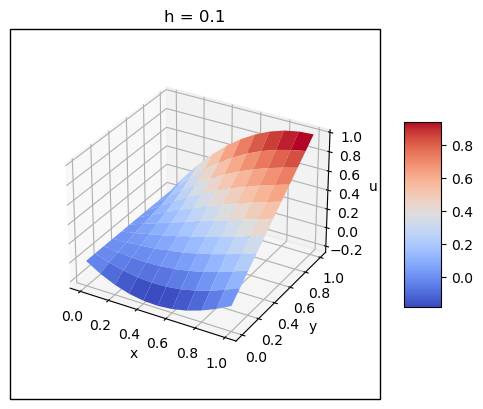

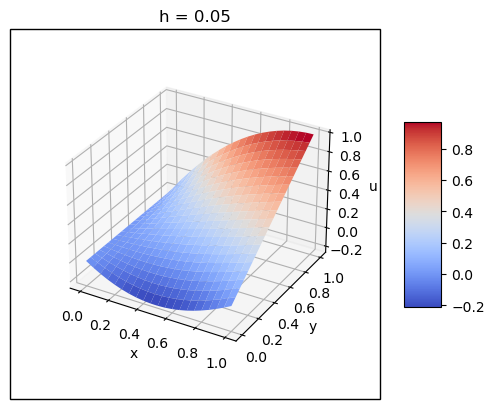

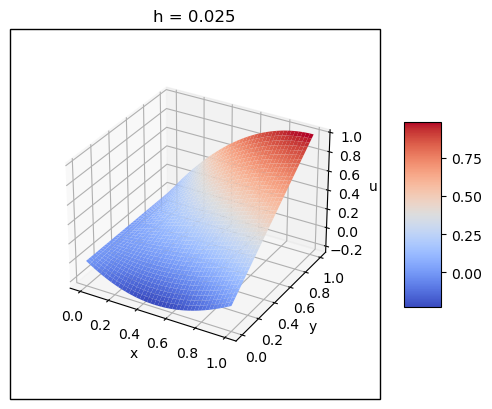

In [21]:
for h,u in U.items():
    fig = plt.figure()
    ax = fig.add_subplot(projection = "3d")
    surf = ax.plot_surface(X_Y_dict[h][0], X_Y_dict[h][1], u, cmap=cm.coolwarm,linewidth=1)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("u")
    ax.set_title(f"h = {h}")
    ax.set_box_aspect(aspect=None, zoom=0.8)
    ax.patch.set_edgecolor('black')  
    ax.patch.set_linewidth(1)  
plt.show()

# These are the contour plots of the final solution u

********************************************************************************************************************